# The Space of Power: Mapping and Data as Political

DIGHUM 101 Summer 2023 Yuqi Tian


# Abstract
While many theorists look into the ways in which Big Data and mapping produce and reproduce particular epistemological understandings of the world (Boyd and Crawford, 2012; Crampton and Krygier, 2005), they also specify that there are potentialities in utilizing data visualization and spatial analysis tools critically. In responding to these arguments (Boyd and Crawford, 2012; Crampton and Krygier, 2005), my research focuses on examining whether maps are political and perpetuate particular senses of realities. In this project, I ask whether maps visualize certain political ideologies and what are the potential factors influencing the messages conveyed in maps. 

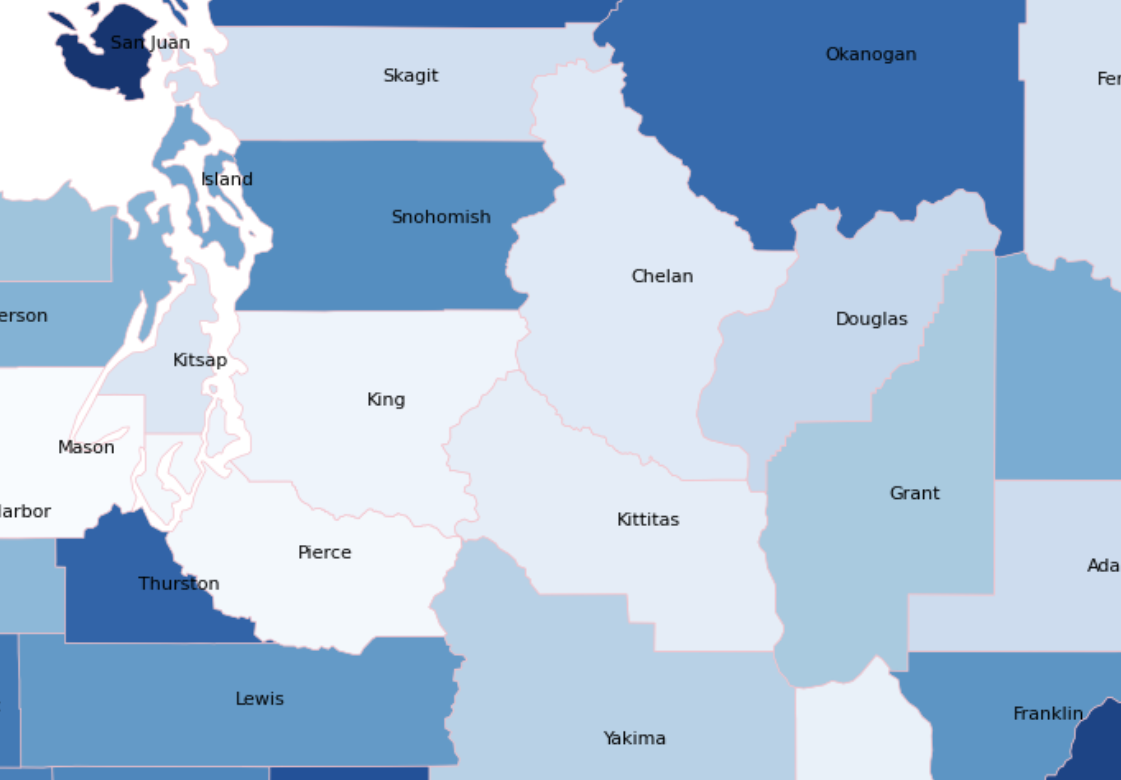

# References

Crampton, & Krygier, J. (2005). An Introduction to Critical Cartography. ACME an International e-Journal for Critical Geographies, 4(1), 11–33.


Danah Boyd & Kate Crawford (2012) CRITICAL QUESTIONS FOR BIG DATA, Information, Communication & Society,15:5, 662-679, DOI: 10.1080/1369118X.2012.678878

Most of the codes I use in this project are referenced from Class Notabook 3.5 GeoPandas and D-Lab Python Geospatial Fundamentals Workshop https://github.com/dlab-berkeley/Geospatial-Fundamentals-in-Python, exceptions will be stated in individual cells. 

In [1]:
# These libraries are only needed to be installed once

#!pip install geopandas 
#!pip install mapclassify
#!pip install descartes
#!pip install pipwin
#!pipwin install gdal
#!pipwin install fiona
#!pip install shap

In [2]:
import os

import pandas as pd
import geopandas as gpd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# DIVA (Data-Interpolating Variational Analysis)

The first set of data I use in this project is the US Administrative Areas from [DIVA-GIS](https://www.diva-gis.org/gdata).

First I would like to see how many rows and columns are here. 

In [3]:
us = gpd.read_file("../../Data/USA_adm.zip")
us.shape

(1, 71)

In [4]:
us.columns

Index(['ID_0', 'ISO', 'NAME_0', 'OBJECTID_1', 'ISO3', 'NAME_ENGLI', 'NAME_ISO',
       'NAME_FAO', 'NAME_LOCAL', 'NAME_OBSOL', 'NAME_VARIA', 'NAME_NONLA',
       'NAME_FRENC', 'NAME_SPANI', 'NAME_RUSSI', 'NAME_ARABI', 'NAME_CHINE',
       'WASPARTOF', 'CONTAINS', 'SOVEREIGN', 'ISO2', 'WWW', 'FIPS', 'ISON',
       'VALIDFR', 'VALIDTO', 'POP2000', 'SQKM', 'POPSQKM', 'UNREGION1',
       'UNREGION2', 'DEVELOPING', 'CIS', 'Transition', 'OECD', 'WBREGION',
       'WBINCOME', 'WBDEBT', 'WBOTHER', 'CEEAC', 'CEMAC', 'CEPLG', 'COMESA',
       'EAC', 'ECOWAS', 'IGAD', 'IOC', 'MRU', 'SACU', 'UEMOA', 'UMA', 'PALOP',
       'PARTA', 'CACM', 'EurAsEC', 'Agadir', 'SAARC', 'ASEAN', 'NAFTA', 'GCC',
       'CSN', 'CARICOM', 'EU', 'CAN', 'ACP', 'Landlocked', 'AOSIS', 'SIDS',
       'Islands', 'LDC', 'geometry'],
      dtype='object')

Then the data type in each column.

In [5]:
us.dtypes

ID_0             int64
ISO             object
NAME_0          object
OBJECTID_1       int64
ISO3            object
                ...   
AOSIS          float64
SIDS           float64
Islands        float64
LDC            float64
geometry      geometry
Length: 71, dtype: object

The following step would be directly plotting the data. Here we see that the Administrative Areas in the US include the mainland, Alaska, Hawaii, and more.

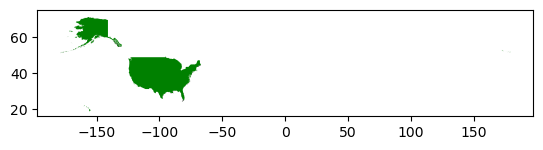

In [6]:
us.plot(color='green');

# US States and the Political Message of the Polygons

We see that in the map we just generated,there are no shapes of states nor counties. This maps shows only the shpe of US. 
The next step is importing data regarding states in the US. Here I use the same file we used in Class Notebook 3.5, the file named "us_states.shp" in the Data folder in DIGHUM101-2023.

I first examine the details of the file.

In [7]:
states = gpd.read_file("../../Data/Geo/us_states/us_states.shp")
states

,STATE,GEOID,ABBREV,geometry
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,02,AK,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
5,Colorado,08,CO,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
6,Connecticut,09,CT,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ..."
7,Delaware,10,DE,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ..."
8,District of Columbia,11,DC,"POLYGON ((-77.11976 38.93434, -77.11253 38.940..."
9,Georgia,13,GA,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ..."


In [8]:
states.head()

,STATE,GEOID,ABBREV,geometry
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,02,AK,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [9]:
states.shape

(56, 4)

In [10]:
states['STATE'].values

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Maryland', 'Minnesota', 'Mississippi', 'Montana',
       'Nevada', 'New Jersey', 'New Mexico', 'North Dakota', 'Oklahoma',
       'Pennsylvania', 'South Carolina', 'South Dakota', 'Utah',
       'Vermont', 'West Virginia', 'Wyoming', 'American Samoa',
       'Puerto Rico', 'Florida', 'Kentucky', 'Louisiana', 'Maine',
       'Massachusetts', 'Michigan', 'Missouri', 'Nebraska',
       'New Hampshire', 'New York', 'North Carolina', 'Ohio', 'Oregon',
       'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington',
       'Wisconsin', 'Guam',
       'Commonwealth of the Northern Mariana Islands',
       'United States Virgin Islands'], dtype=object)

While in the previous steps I demonstrate that this file contains information about US states, the following step is to generate a map of the US with polygons of the US states and islands. 

<Axes: >

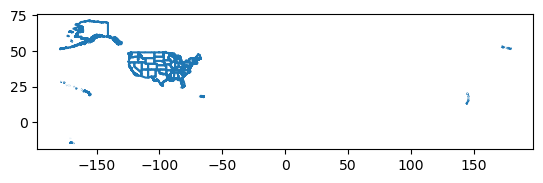

In [11]:
states.boundary.plot()

Both maps contain territories other than mainland US, the following step creates a map with states polygons but only shows non-contiguous US (mainland US). 

In [12]:
non_contiguous_us = ['American Samoa',
                     'Puerto Rico',
                     'Guam',
                     'Commonwealth of the Northern Mariana Islands',
                     'United States Virgin Islands',
                     'Alaska',
                     'Hawaii']
states_limited = states.loc[~states['STATE'].isin(non_contiguous_us)]

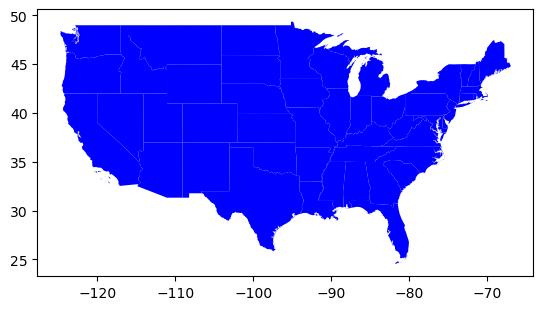

In [13]:
states_limited.plot(color='blue');

These maps look different because the areas they cover are different, even through all of them can be called maps of the US. Even thought the territory they depict are technically the same, the specificity of the maps inherently contain political message of where and what is US territory.

In [14]:
print(states_limited.shape)

(49, 4)


# Projections and Coordinate Systems

We can further check the coordinate system of the map (states_limited) we just generated.

In [15]:
print(states_limited.crs)

EPSG:4326


According to lessons/03_crs_map_projections.ipynb in D-Lab Python Geospatial Fundamentals Workshop, 4326 stands for WGS84 and 3310 stands for Albers Equal Area projection.

The following map contains the same geographical information as the states_limited map above but with a different projection and coordinate system.

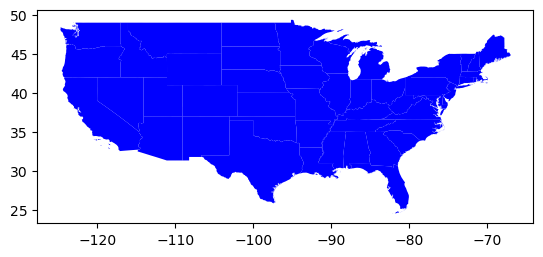

In [16]:
states_limited.crs = None
states_limited.crs = "epsg:3310"
states_limited.crs
states_limited.plot(color='blue');

For comparison, I change the coordinate system back to 4326. With different projections, the size of US territory is changed and this shows that the difference in the projections and coordinate systems used in mapping demonstrates different perspectives. The mapper's decisions in choose which projection makes the map conveying an intended perspective of the place.

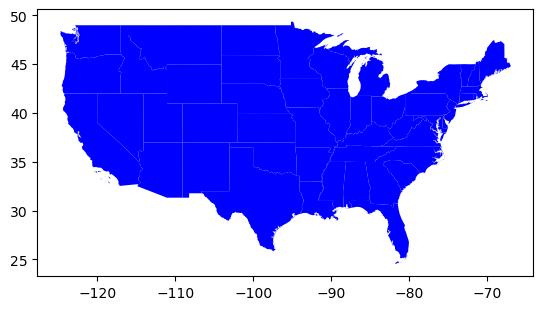

In [17]:
states_limited.crs = None
states_limited.crs = "epsg:4326"
states_limited.crs
states_limited.plot(color='blue');

The following maps are further customized in color, X, Y axises, and figure size.

(20.0, 50.0)

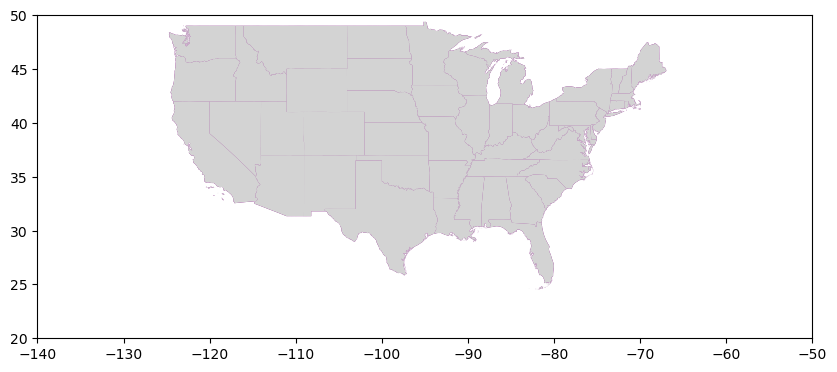

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

states_limited.plot(color='purple', ax=ax)

states_limited.plot(color='lightgrey', ax=ax)

ax.set_xlim(-140, -50)
ax.set_ylim(20, 50)

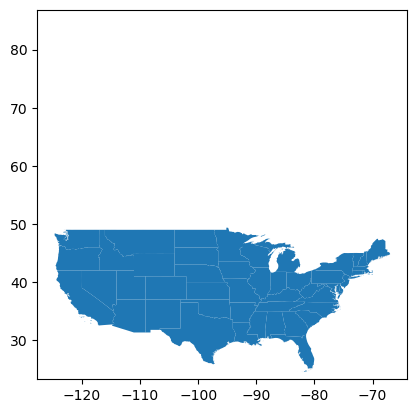

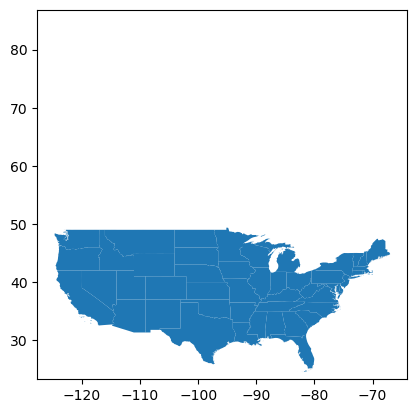

In [19]:
states_limited.plot();
plt.axis('square');


states_limited.plot();
plt.axis('square')

plt.show()

# States and Counties
In the following steps, I first plot a map of the US with state polygons then counties. To get boundaries of US states, I again use the file named "us_states.shp" in the Data folder in DIGHUM101-2023.

In [20]:
state_boundaries = gpd.read_file("../../Data/Geo/us_states/us_states.shp")
print(state_boundaries.shape)
state_boundaries.head()

(56, 4)


,STATE,GEOID,ABBREV,geometry
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,02,AK,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


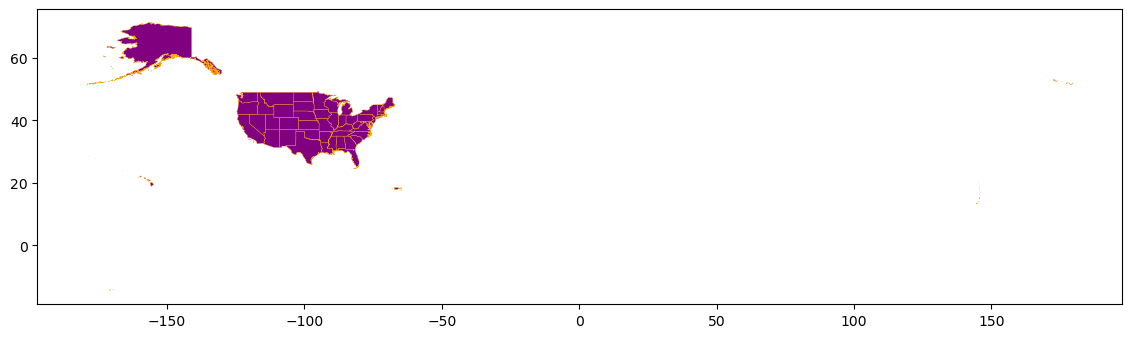

In [21]:
state_boundaries.plot(linewidth=0.25, 
                                         edgecolor='orange', 
                                         facecolor='purple', 
                                         figsize=(14,10));

For US counties, I use the file "cb_2018_us_county_5m.zip" in the Data folder in DIGHUM101-2023.

In [22]:
counties = gpd.read_file("zip://../../Data/Geo/cb_2018_us_county_5m.zip")
print(counties.shape)
counties.head()

(3233, 10)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,12,033,00295737,0500000US12033,12033,Escambia,06,1701544502,563927612,"POLYGON ((-87.62999 30.87766, -87.62946 30.880..."
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
4,28,153,00695797,0500000US28153,28153,Wayne,06,2099745573,7255476,"POLYGON ((-88.94317 31.78421, -88.94335 31.824..."


<Axes: >

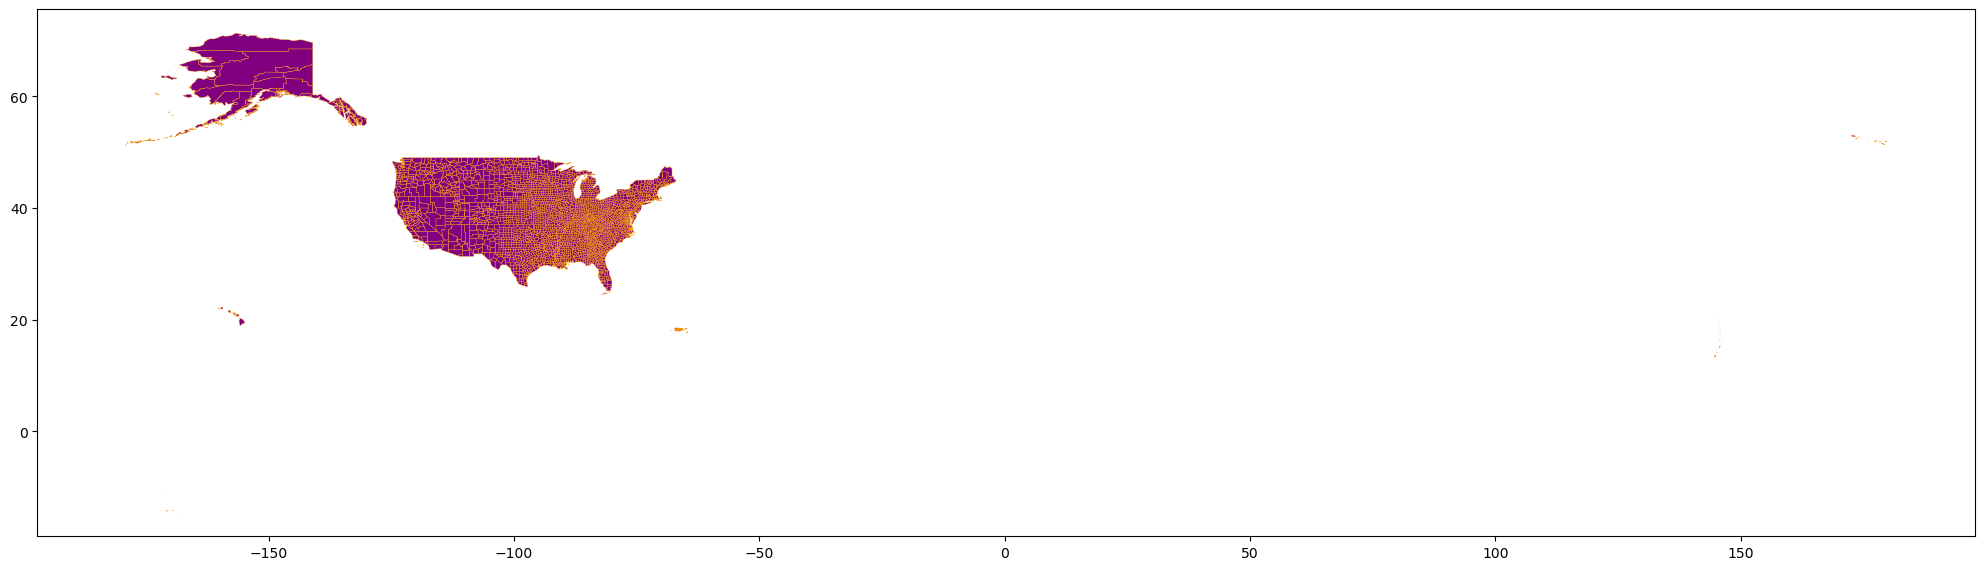

In [23]:
counties.plot(linewidth=0.25, 
                                         edgecolor='orange', 
                                         facecolor='purple', 
                                         figsize=(25,16))

Map of mainland US with shapes of counties can be generated with the following commands.

(20.0, 50.0)

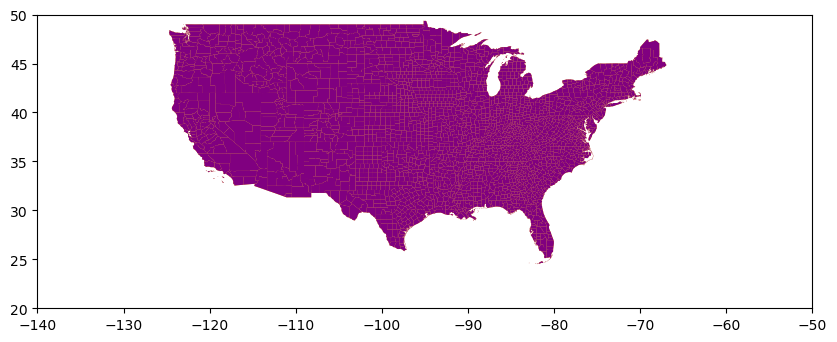

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
counties.plot(color='orange', ax=ax)
counties.plot(color='purple', ax=ax)
ax.set_xlim(-140, -50)
ax.set_ylim(20, 50)

Although both the map showing states and that of counties can be called map of political regions in the UC, the specificity of information makes the maps serve different purposes.

The purpose of the map can be further articulated through textual messages such as a title.

Text(0.5, 1.0, 'States in the US')

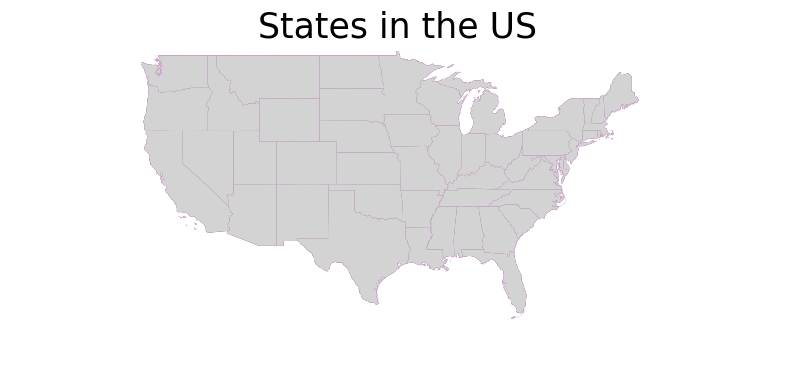

In [25]:


fig, ax = plt.subplots(figsize=(10, 10))

states_limited.plot(color='purple', ax=ax)

states_limited.plot(color='lightgrey', ax=ax)

ax.set_xlim(-140, -50)
ax.set_ylim(20, 50)
#The following two lines are referenced from https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d
ax.axis("off")
ax.set_title("States in the US", fontdict={"fontsize": "25", "fontweight" : "3"})


# States in Details and Aesthetic of Maps
In this section, I elaborate on the ways in which maps are political due to the decisions regarding size of the image, specificity of informaton, and classification colors with examples of Hawaii and Washington.

We pick out the information regarding Hawaii with the STATEFP 15. The file here is still "cb_2018_us_county_5m.zip" in the Data folder in DIGHUM101-2023.

In [26]:
hi_counties = counties.loc[counties["STATEFP"] == "15"]
print(hi_counties.shape)
hi_counties.head()

(5, 10)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
829,15,009,00365283,0500000US15009,15009,Maui,06,3008348862,3203294204,"MULTIPOLYGON (((-156.69989 20.92063, -156.6941..."
1696,15,003,00365281,0500000US15003,15003,Honolulu,06,1555453537,4055036094,"POLYGON ((-158.27768 21.57879, -158.25442 21.5..."
1874,15,007,00365282,0500000US15007,15007,Kauai,06,1605492325,1674244229,"MULTIPOLYGON (((-159.78794 22.03010, -159.7838..."
2014,15,001,00365280,0500000US15001,15001,Hawaii,06,10433637868,2739470031,"POLYGON ((-156.05722 19.74254, -156.05231 19.7..."
2187,15,005,01702380,0500000US15005,15005,Kalawao,06,31057603,105764468,"POLYGON ((-157.01455 21.18550, -156.99911 21.1..."


This is a map with only the shape of Hawaii.

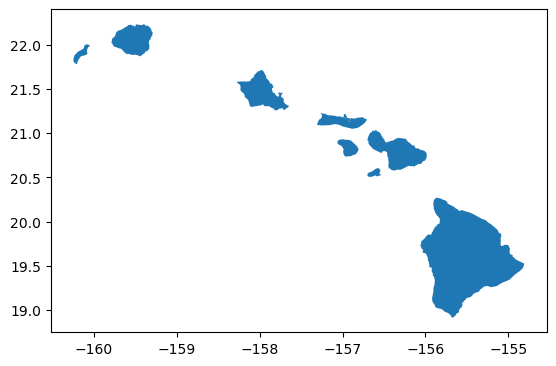

In [27]:
hi_counties.plot();

However, if we generate the map with state boundaries with no further customizations, Hawaii would look smaller shown as a state.

In [28]:
state_boundaries

,STATE,GEOID,ABBREV,geometry
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,02,AK,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
5,Colorado,08,CO,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
6,Connecticut,09,CT,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ..."
7,Delaware,10,DE,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ..."
8,District of Columbia,11,DC,"POLYGON ((-77.11976 38.93434, -77.11253 38.940..."
9,Georgia,13,GA,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ..."


In [29]:
hawaii = state_boundaries.loc[state_boundaries["ABBREV"] == "HI"]
hawaii

,STATE,GEOID,ABBREV,geometry
10,Hawaii,15,HI,"MULTIPOLYGON (((-175.74126 27.92406, -175.7363..."


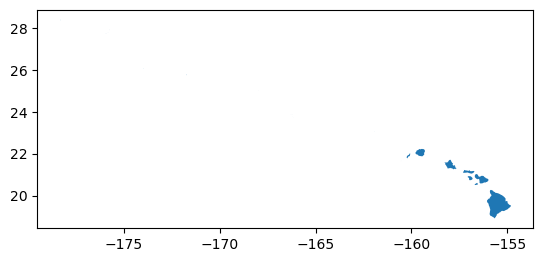

In [30]:
hawaii.plot(); 

The ways in which different settings in plotting generate different ways of visualizing the same sapce convey different focuses of the map. While the first map of Hawaii may emphasize on the shape of the islands and centers the shapes, the second map shows Hawaii on the side. The size of a represented space could be ways of deomonstrating its importance on the map, same as if the space is placed on the center of the map. 

The next case study is the state of Washington. The first step is to pick out the shapes of counties. The second is for the shape of the entire state.

In [31]:
wa_counties = counties.loc[counties["STATEFP"] == "53"]
print(wa_counties.shape)
wa_counties.head()

(39, 10)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
152,53,045,01529221,0500000US53045,53045,Mason,06,2484892348,237296354,"POLYGON ((-123.50592 47.60461, -123.37701 47.6..."
188,53,053,01529159,0500000US53053,53053,Pierce,06,4319603700,356508318,"MULTIPOLYGON (((-122.70754 47.08533, -122.6937..."
204,53,033,01531933,0500000US53033,53033,King,06,5478600963,497675093,"MULTIPOLYGON (((-122.42984 47.65892, -122.4078..."
435,53,005,01513302,0500000US53005,53005,Benton,06,4402941863,154661532,"POLYGON ((-119.87672 46.56273, -119.87404 46.6..."
598,53,037,01531926,0500000US53037,53037,Kittitas,06,5949976986,92436008,"POLYGON ((-121.46595 47.36798, -121.43779 47.3..."


In [32]:
washington = state_boundaries.loc[state_boundaries["ABBREV"] == "WA"]
washington

,STATE,GEOID,ABBREV,geometry
51,Washington,53,WA,"MULTIPOLYGON (((-122.33164 48.02056, -122.3283..."


The first map I generate still only contains the shape of the state.

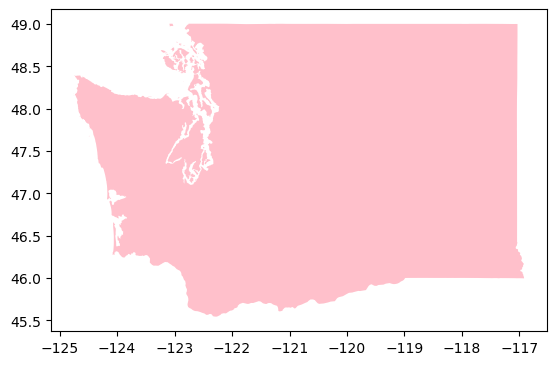

In [33]:
washington.plot(color = "pink"); 

The second map is still the map of Washington but with county polygons. 

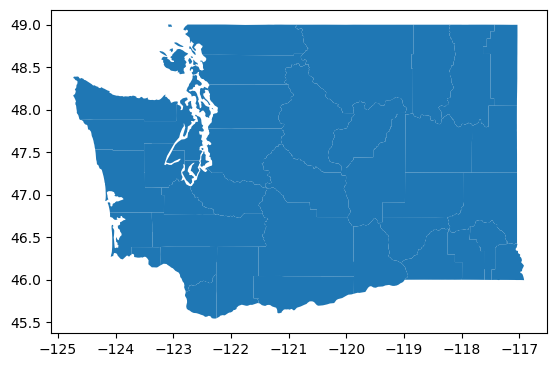

In [34]:
wa_counties.plot();

This step is to prepare for further customization of the map of Washington.

In [35]:
pop = wa_counties
pop.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
152,53,045,01529221,0500000US53045,53045,Mason,06,2484892348,237296354,"POLYGON ((-123.50592 47.60461, -123.37701 47.6..."
188,53,053,01529159,0500000US53053,53053,Pierce,06,4319603700,356508318,"MULTIPOLYGON (((-122.70754 47.08533, -122.6937..."
204,53,033,01531933,0500000US53033,53033,King,06,5478600963,497675093,"MULTIPOLYGON (((-122.42984 47.65892, -122.4078..."
435,53,005,01513302,0500000US53005,53005,Benton,06,4402941863,154661532,"POLYGON ((-119.87672 46.56273, -119.87404 46.6..."
598,53,037,01531926,0500000US53037,53037,Kittitas,06,5949976986,92436008,"POLYGON ((-121.46595 47.36798, -121.43779 47.3..."


The following map is Washington with state polygons and counties with further color classifications to show shapes of counties.

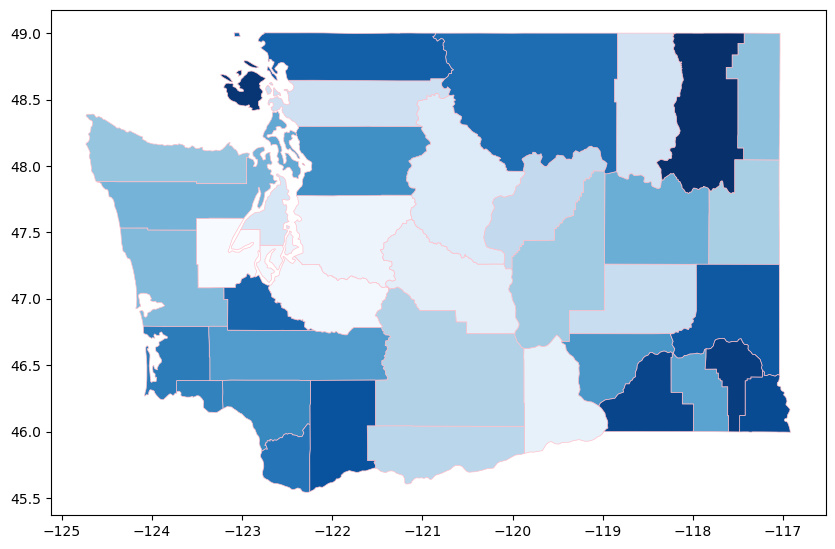

In [36]:
pop.plot(
    
    cmap = "Blues", 
    
    edgecolor = "pink", 
    
    linewidth = 0.5, 
    
    figsize = (10, 10),
    
    legend = True,
    
    k = 10
);

I then test the map with a different color and figure size.

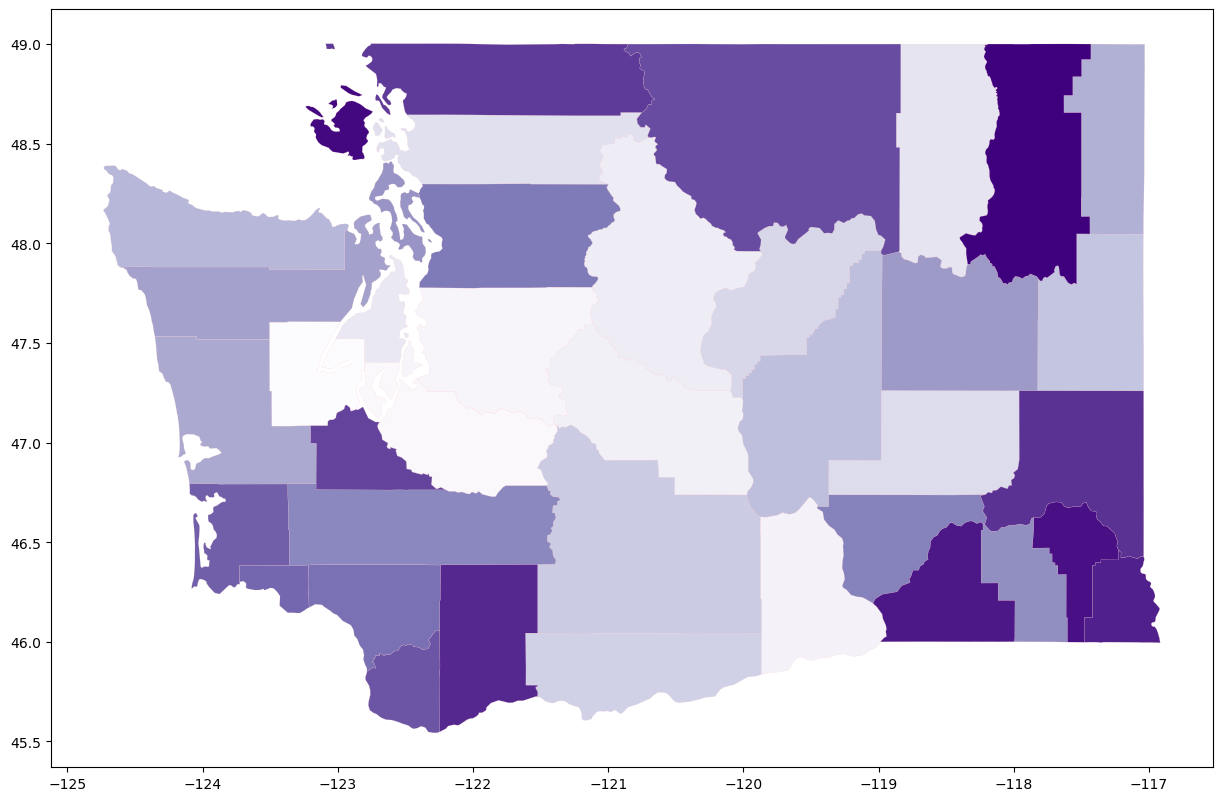

In [37]:
pop.plot(
             cmap = "Purples", 
             edgecolor = "pink", 
             linewidth = 0.1,  
             legend = True, 
             figsize = (15,12),
             k = 7   
            );

I decided that I still prefer the blue version but I do like the 15, 12 figure size so I ended up using the blue color but 15, 12 figure size. I also removed the axises and added a title, as well as names of counties.
This final step intends to show that the map is produced through the mapper's choices and that the names and titles allow the map to cater for a wider population. The map that only shows the shape of Washington may still be recognizible to some people, but with a title, the polygons of the counties, and the names of the counties would make the map having more directory functions and serve more purposes. I believe findings in this research should not be interpreted as which map is better but they show that maps are made with choices so that they are not neutral nor the reality, they are simply representations of the world, same as data.

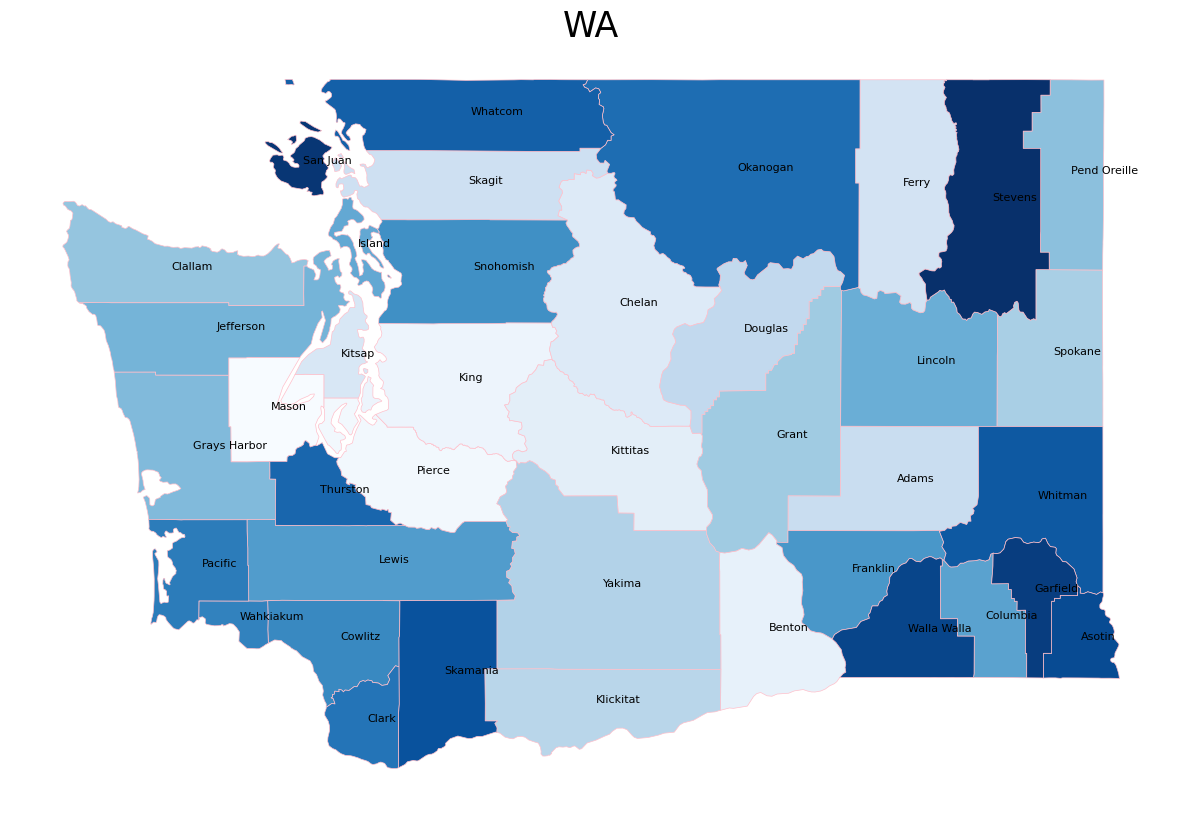

In [38]:
import matplotlib.pyplot as plt

pop_points = pop.to_crs('+proj=cea').centroid.to_crs(pop.crs)

ax = pop.plot(figsize = (15, 12), cmap = "Blues", 
                  edgecolor = "pink", linewidth = 0.5)

#The following to lined are referenced from https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

ax.axis("off")
ax.set_title("WA", fontdict={"fontsize": "25", "fontweight" : "3"})

texts = []
for x, y, label in zip(pop_points.geometry.x, pop_points.geometry.y, pop["NAME"]):
    texts.append(plt.text(x, y, label, fontsize = 8))
    


# Conclusion
In this research I learn that the ways in which maps are made political are through the mappers’ choices on things including but not limited to projections, sizes, titles, and specificity of textual information. 